# A Beginners Guide to Beating the Bookmakers with TensorFlow

Let's first run the predict script.

In [ ]:
%run -i predict.py

Import the training log saved by the script and plot this

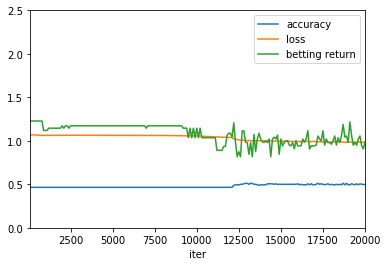

In [9]:
import os
import pandas as pd

if os.path.exists('training-log.csv'):
    os.rename('training-log.csv','training-log_01.csv')

df = pd.read_csv('training-log_01.csv', header=None, names=['iter','accuracy','loss','betting return']).set_index('iter')

%matplotlib inline
_ = df.plot(ylim=(0,2.5))

Betting return differs significantly from the return specified on site. 

There are a number of reasons that can explain the difference
- default parameters (tensorflow version)
- weight initialisation
- shuffling of the input data before training

Let's rerun the script with tensorflow v1.4 which was most commonly used at the time the blog was written.

In [ ]:
from pip._internal import main as pipmain
pipmain(['install','tensorflow==1.4'])

Check if the downgrade of tensorflow was succesful.

In [6]:
import tensorflow
print (tensorflow.__version__)

1.4.0


Remove previous model

In [ ]:
import shutil
shutil.rmtree('model')

Run with the older version of tensorflow

In [ ]:
%run -i predict.py

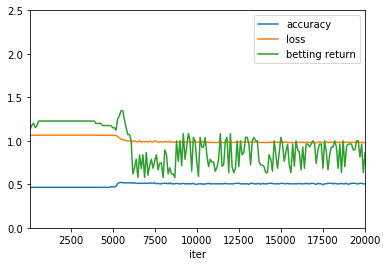

In [13]:
if os.path.exists('training-log.csv'):
    os.rename('training-log.csv','training-log_02.csv')

df = pd.read_csv('training-log_02.csv', header=None, names=['iter','accuracy','loss','betting return']).set_index('iter')

%matplotlib inline
_ = df.plot(ylim=(0,2.5))

Run the script 10 times, to check if it was caused by weights initialization or shuffling the training data.

In [ ]:
for run in range(10):
    if os.path.exists('model'):
        shutil.rmtree('model')
    %run -i predict.py
    if os.path.exists('training-log.csv'):
        os.rename('training-log.csv','training-log_%02d.csv' % (run + 3))

Let's visualize all the data we have gathered. 

In [1]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15,15))
axs = fig.subplots(4,3)

from collections.abc import Iterable
def flatten(arr):
    for i in arr:
        if isinstance(i, Iterable):
            yield from flatten(i)
        else:
            yield i
    
axs = list(flatten(axs))

dataframes = []
for i in range(12):
    df = pd.read_csv('training-log_%02d.csv' % (i+1), header=None, names=['iter','accuracy','loss','betting return']).set_index('iter')
    if not df.empty:
        _ = df.plot(ylim=(0,2.5),ax=axs[i])
        dataframes.append(df)
        
df = pd.concat({n: df for n, df in enumerate(dataframes)},axis=0)
_ = df.mean(level=1).plot(ax=asx[11], ylim=(0,2.5))

NameError: name 'pd' is not defined

None of our runs, show the same graph as the one reported by Andrew. 

This simple example shows that using a dense network to model betting strategies, does not always generate 
similar results. I leave it up to the experts to explain this behaviour. 

It is possible that I am using out of date code or have done something wrong during the execution of the scripts.

Please give feedback if you find something wrong in the examples.

If we take the mean of our models, we have an accuracy of about 49% and a betting return which oscilates around 1.

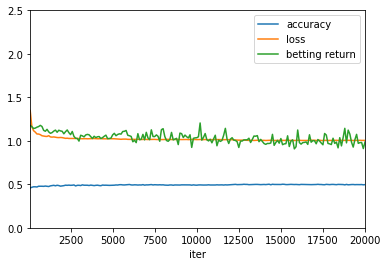

In [86]:
dataframes = []
for i in range(12):
    df = pd.read_csv('training-log_%02d.csv' % (i+1), header=None, names=['iter','accuracy','loss','betting return']).set_index('iter')
    if not df.empty:
        dataframes.append(df)